In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss

import sys
sys.path.insert(0, '../util/')
from util import util

In [2]:
datapath = '/home/jw1624/H1-merian/csvs/breathingModes_clean/'

## Set params

In [3]:
cdmgals = util.getGalaxies()[0]

In [5]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [6]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

## Looking at r431 first

In [9]:
df = pd.read_csv(datapath+'r431_qtys.txt')
df.head()

,galaxyID,timestep,t,z,M_star,R_halflight_s,R_halflight_c,R_halfmass,sigma_star,sigma_youngstar,log_sigma_pred_10,log_sigma_pred_100,sigma_star_m,sigma_youngstar_m,SFR_10,SFR_100,sSFR_10,sSFR_100
0,431,4096,13.800820,-2.155099e-12,1.486476e+09,4.186630,4.130957,2.441406,45.101894,32.018731,1.464225,1.452189,78.165332,83.155835,2.702323e+06,2.377159e+07,-9.740421,-9.796100
1,431,3606,12.151915,1.248916e-01,1.223316e+09,3.731433,3.719494,2.441406,47.055990,33.413166,1.447248,1.426124,75.020534,83.461427,2.360590e+06,1.882841e+07,-9.714518,-9.812725
2,431,3360,11.324097,1.970354e-01,1.106754e+09,3.297513,3.205633,2.441406,47.847448,37.616569,1.448659,1.435760,74.277657,78.496538,2.455747e+06,2.138289e+07,-9.653867,-9.713985
3,431,3195,10.768853,2.497949e-01,1.029129e+09,3.824660,3.799650,2.441406,48.034740,34.253262,1.432209,1.428515,72.531046,87.227756,2.095297e+06,2.013723e+07,-9.691224,-9.708470
4,431,3168,10.677995,2.588017e-01,1.014064e+09,3.329610,3.289149,2.441406,48.191613,35.488959,1.412467,1.396817,71.890903,83.299246,1.700645e+06,1.437178e+07,-9.775452,-9.848555


Text(0.5, 0, 'z')

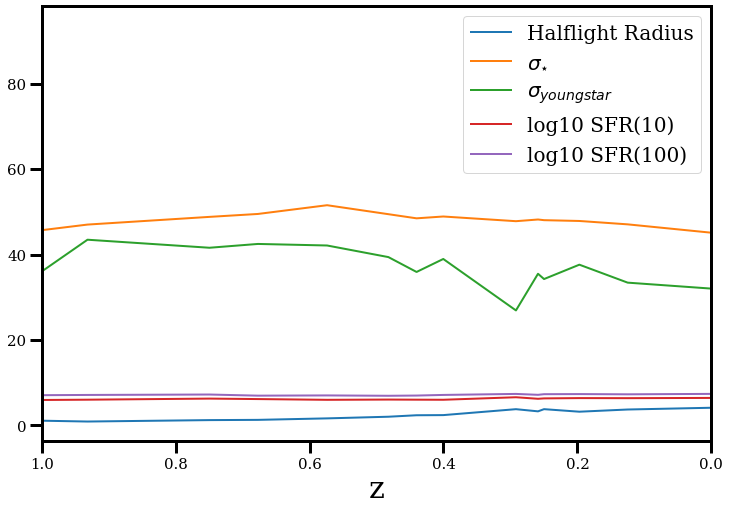

In [10]:
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.plot(df['z'], df['R_halflight_c'], linewidth=2)
plt.plot(df['z'], df['sigma_star'], linewidth=2)
plt.plot(df['z'], df['sigma_youngstar'], linewidth=2)
plt.plot(df['z'], np.log10(df['SFR_10']), linewidth=2)
plt.plot(df['z'], np.log10(df['SFR_100']), linewidth=2)

plt.xlim([1.0,0])

plt.tick_params(axis='both', which='major', labelsize=15)

plt.legend(['Halflight Radius', r'$\sigma_{\star}$', r'$\sigma_{young star}$', 'log10 SFR(10)', 
            'log10 SFR(100)'], fontsize=20)

plt.xlabel('z', fontsize=30)

#plt.savefig('figures/breathing/prelim.png')

## mstar over time

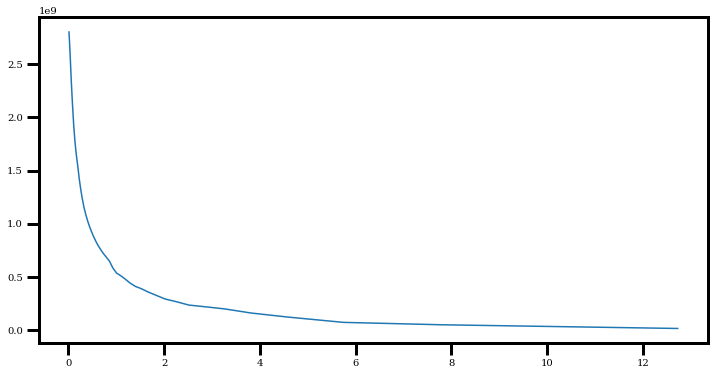

In [11]:
gal = cdmgals[9]
data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

plt.figure(facecolor='w', figsize=(12,6))

plt.plot(data['z'], data['M_star'])

In [98]:
np.where(df['M_star']==max(df['M_star']))

(array([0]),)

## Three Panel Figure
R_hm, sSFR and sigma as functions of time

In [8]:
data.head()

,galaxyID,timestep,t,z,M_star,R_halflight_s,R_halflight_c,R_halfmass,sigma_gas,sigma_star,sigma_youngstar,log_sigma_pred_10,log_sigma_pred_100,SFR_10,SFR_100,sSFR_10,sSFR_100


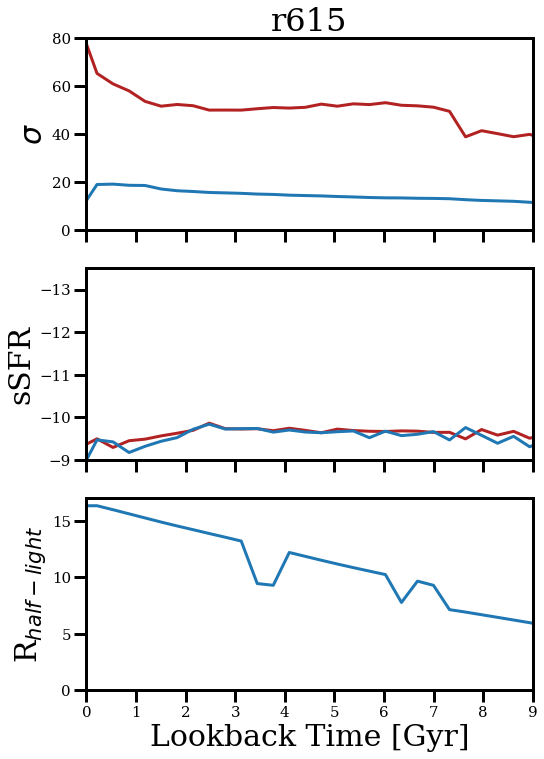

In [40]:
gal = cdmgals[0]
data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

fig, axs = plt.subplots(3,1, facecolor='w', figsize=(8,12), sharex=True)
tlim = 9

axs[0].set_title('r'+str(gal), fontsize=32, weight='bold')

# get lookback time 
tlookback = abs(data['t'] - max(data['t']))

mask = tlookback<tlim

# top panel: sigma
sigStar = data['sigma_star'][tlookback<tlim+1]
sigGas = data['sigma_gas'][tlookback<tlim+1]

axs[0].plot(tlookback[tlookback<tlim+1], sigStar, linewidth=3, color='firebrick')
axs[0].plot(tlookback[tlookback<tlim+1], sigGas, linewidth=3, color='tab:blue')

axs[0].tick_params(axis='both', which='major', labelsize=15)

axs[0].set_ylabel(r'$\sigma$', fontsize=30)

#axs[0].legend(['stars', 'gas'], fontsize=20)

axs[0].set_xlim([0,tlim])
axs[0].set_ylim([0,80])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tlookback<tlim+1]
ssfr100= data['sSFR_100'][tlookback<tlim+1]

axs[1].plot(tlookback[tlookback<tlim+1], ssfr100, color='firebrick', linewidth=3)
axs[1].plot(tlookback[tlookback<tlim+1], ssfr10, color='tab:blue', linewidth=3)

axs[1].tick_params(axis='both', which='major', labelsize=15)    

axs[1].set_ylabel('sSFR', fontsize=30)

#axs[1].legend([r'sSFR$_{100MYR}$', r'sSFR$_{10MYR}$'], fontsize=20)

axs[1].set_ylim([-9,-13.5])

# Bottom panel: half-light radius
Rhl = data['R_halflight'][tlookback<tlim+1]

axs[2].plot(tlookback[tlookback<tlim+1], Rhl, linewidth=3)

axs[2].tick_params(axis='both', which='major', labelsize=15)

axs[2].set_ylabel(r'R$_{half-light}$', fontsize=30)

axs[2].set_xlabel('Lookback Time [Gyr]', fontsize=30)

axs[2].set_ylim([0,17])

plt.savefig('../figures/breathing3panel/r'+str(gal)+'.png')

## Scatter sSFR_100 and log10 R_halflight (per galaxy)
Can make one of these for each galaxy and determine a correrlation coefficient

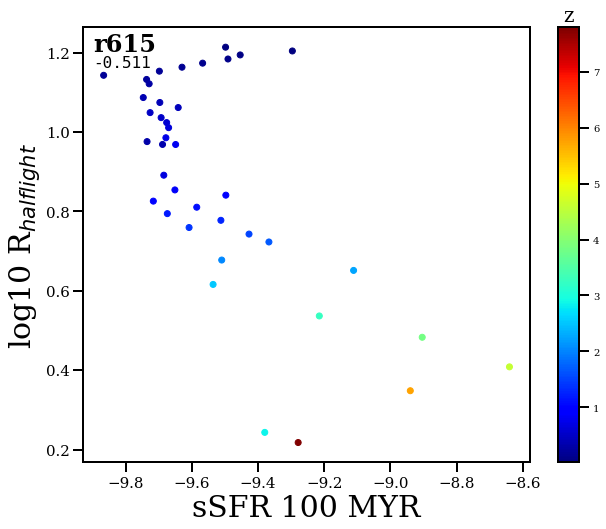

In [50]:
gal = cdmgals[9]
zmax = 10
ymin = -1

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

fig = plt.figure(figsize=(10,8), facecolor='w')

x = data['sSFR_100'][data['z'] <= zmax]
y = np.log10(data['R_halflight'][data['z'] <= zmax])
c = data['z'][data['z'] <= zmax]

c = c[y > ymin]
x = x[y > ymin]
y = y[y > ymin]

rs = ss.spearmanr(x,y)[0]

plt.scatter(x, y, c=c, cmap='jet')

plt.tick_params(axis='both', which='major', labelsize=15)    

plt.xlabel('sSFR 100 MYR', fontsize=30)
plt.ylabel(r'log10 R$_{halflight}$', fontsize=30)

plt.text(s='r'+str(gal), x=min(x[x>-20]-0.03), y=max(y)-0.01, fontsize=24, weight='bold')
plt.text(s=str(rs)[:6], x=min(x[x>-20]-0.03), y=max(y)-0.05, fontsize=16, fontfamily='monospace')

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

clb = plt.colorbar()
clb.ax.set_title('z', fontsize=20)

plt.savefig('../figures/breathingModes/ssfr100_Rhl_perGal/r'+str(gal)+'.png')

## Scatter sSFR_100 and log10 R_halflight (population)

-0.7714285714285715

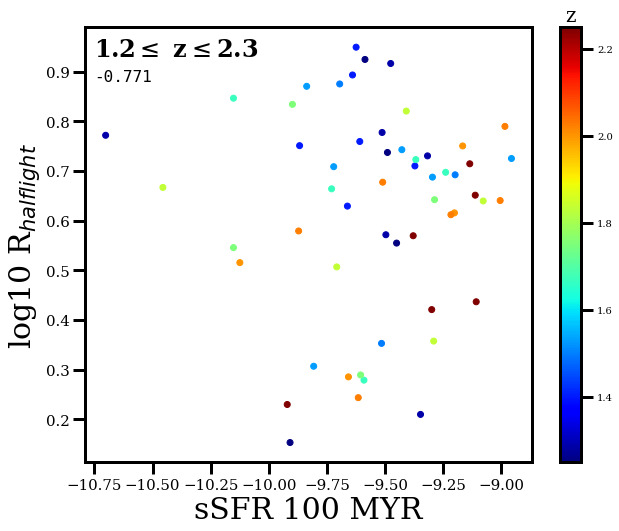

In [13]:
zmin = 1.2
zmax = 2.3

ymin = -0.1
ymax = 2.5

fig = plt.figure(figsize=(10,8), facecolor='w')
xall = []
yall = []
call = []

for idx,gal in enumerate(cdmgals):
    if idx==1: continue
    
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = np.log10(data['R_halflight'][data['z'] <= zmax]).to_numpy()
    c = data['z'][data['z'] <= zmax].to_numpy()
    
    x = x[c>=zmin]
    y = y[c>=zmin]
    c = c[c>=zmin]
    
    c = c[y > ymin]
    x = x[y > ymin]
    y = y[y > ymin]

    c = c[y < ymax]
    x = x[y < ymax]
    y = y[y < ymax]
    
    for i,_ in enumerate(x):
        xall.append(x[i])
        yall.append(y[i])
        call.append(c[i])
    
rs = ss.spearmanr(x,y)[0]

plt.scatter(xall, yall, c=call, cmap='jet')

plt.tick_params(axis='both', which='major', labelsize=15)    

plt.xlabel('sSFR 100 MYR', fontsize=30)
plt.ylabel(r'log10 R$_{halflight}$', fontsize=30)

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

clb = plt.colorbar()
clb.ax.set_title('z', fontsize=20)

plt.text(x= -10.75, y=0.93, s=str(zmin)+r'$\leq$ z$\leq$'+str(zmax), fontsize=24, weight='bold')
plt.text(x= -10.75, y=0.88,s=str(rs)[:6], fontsize=16, fontfamily='monospace')

plt.savefig('../figures/breathingModes/ssfr100_Rhl/z'+str(zmax)+'_double.png')

rs

## 2 Panel R_halfmass and sSFR
for low redshift and hirtenstein redshift ranges

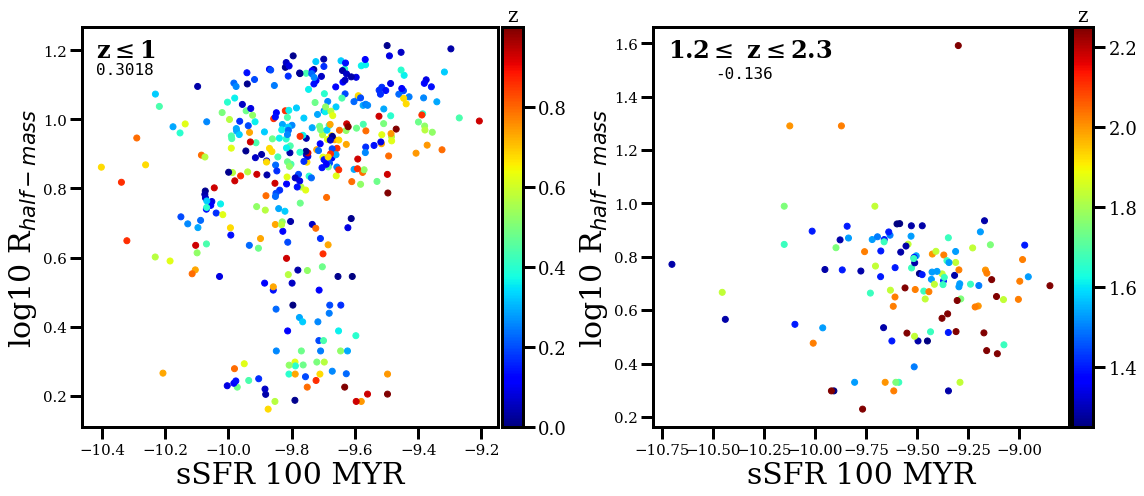

In [102]:
zmaxl = 1

zmin = 1.2
zmax = 2.3

ymin = -100
ymax = 100

fig, axs = plt.subplots(1,2, figsize=(16,7), facecolor='w')

## left side 
xall = []
yall = []
call = []
for idx,gal in enumerate(cdmgals):
    if gal==597: continue
    
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmaxl].to_numpy()
    y = np.log10(data['R_halfmass'][data['z'] <= zmaxl]).to_numpy()
    c = data['z'][data['z'] <= zmaxl].to_numpy()
    
    c = c[y > ymin]
    x = x[y > ymin]
    y = y[y > ymin]

    c = c[y < ymax]
    x = x[y < ymax]
    y = y[y < ymax]
    
    for i,_ in enumerate(x):
        xall.append(x[i])
        yall.append(y[i])
        call.append(c[i])
    
rsl = ss.spearmanr(xall,yall)[0]

s0 = axs[0].scatter(xall, yall, c=call, cmap='jet')

axs[0].tick_params(axis='both', which='major', labelsize=15)    

axs[0].set_xlabel('sSFR 100 MYR', fontsize=30)
axs[0].set_ylabel(r'log10 R$_{half-mass}$', fontsize=30)

#axs[0].set_ylim([ymin,ymax])
#axs[0].set_xlim([-10.7,-8.75])

axs[0].text(x= -10.42, y=1.18, s=r'z$\leq$'+str(zmaxl), fontsize=24, weight='bold')
axs[0].text(x= -10.42, y=1.13,s=str(rsl)[:6], fontsize=16, fontfamily='monospace')

divider = make_axes_locatable(axs[0])
clb = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(s0, cax=clb, orientation='vertical')

clb.set_title('z', fontsize=20)
clb.tick_params(axis='both', which='major', labelsize=18)

## right side
xall = []
yall = []
call = []
for idx,gal in enumerate(cdmgals):
    if gal==597: continue
    
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = np.log10(data['R_halfmass'][data['z'] <= zmax]).to_numpy()
    c = data['z'][data['z'] <= zmax].to_numpy()
    
    x = x[c>=zmin]
    y = y[c>=zmin]
    c = c[c>=zmin]
    
    c = c[y > ymin]
    x = x[y > ymin]
    y = y[y > ymin]

    c = c[y < ymax]
    x = x[y < ymax]
    y = y[y < ymax]
    
    for i,_ in enumerate(x):
        xall.append(x[i])
        yall.append(y[i])
        call.append(c[i])
    
rsr = ss.spearmanr(xall,yall)[0]

s1 = axs[1].scatter(xall, yall, c=call, cmap='jet')

axs[1].tick_params(axis='both', which='major', labelsize=15)    

axs[1].set_xlabel('sSFR 100 MYR', fontsize=30)
axs[1].set_ylabel(r'log10 R$_{half-mass}$', fontsize=30)

#axs[1].set_ylim([ymin,ymax])
#axs[1].set_xlim([-10.7,-8.75])

#clb = plt.colorbar()
#clb.ax.set_title('z', fontsize=20)

axs[1].text(x= -10.72, y=1.55, s=str(zmin)+r'$\leq$ z$\leq$'+str(zmax), fontsize=24, weight='bold')
axs[1].text(x= -10.49, y=1.47,s=str(rsr)[:6], fontsize=16, fontfamily='monospace')

divider = make_axes_locatable(axs[1])
clb = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(s1, cax=clb, orientation='vertical')

clb.set_title('z', fontsize=20)
clb.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

plt.savefig('../figures/breathingModes/ssfr100_Rhm_population/2panel.png')

## Combined 3 Panel and Per Gal Scatter

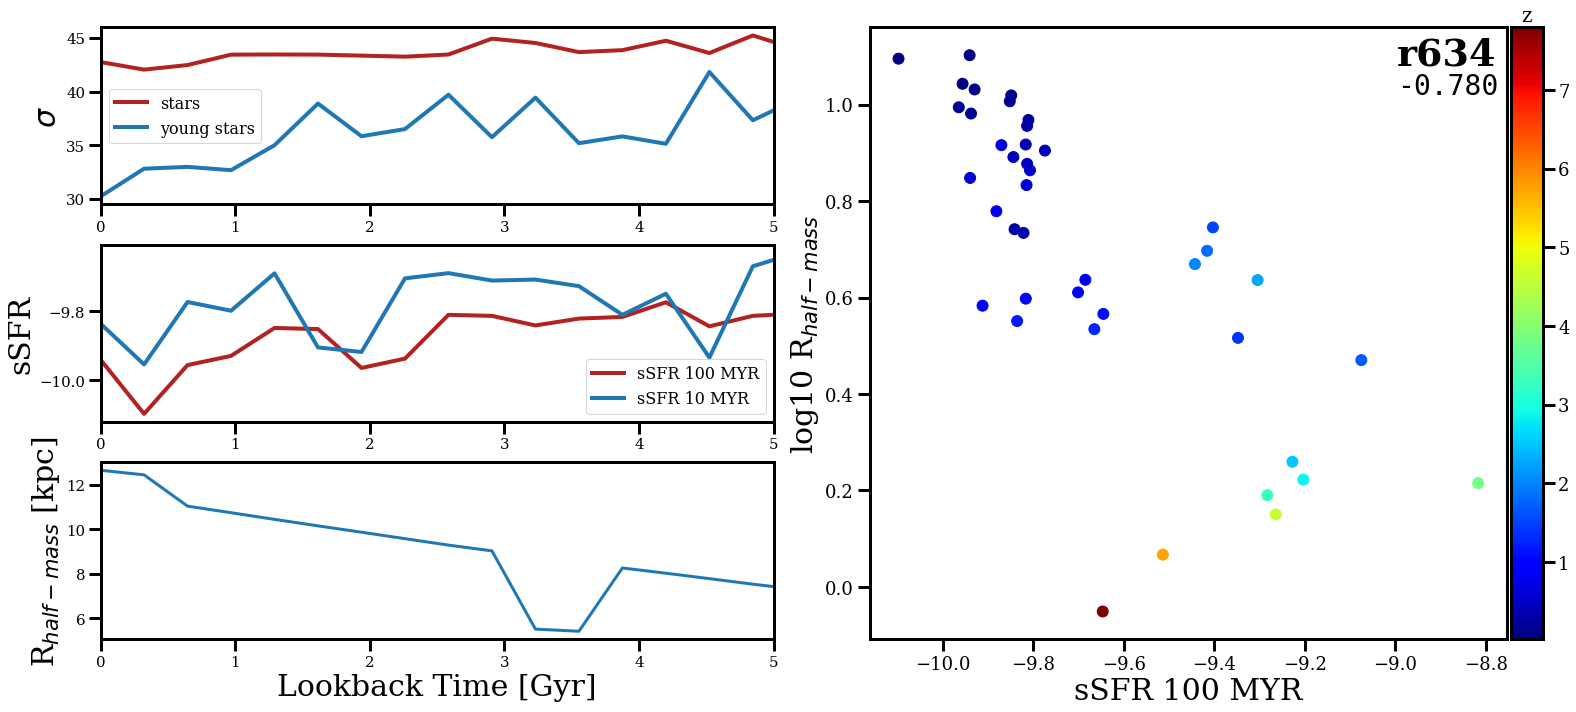

In [62]:
gal = cdmgals[15]
zmax = 10
ymin = -1

tlim = 5

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
tlookback = abs(data['t'] - max(data['t']))
mask = tlookback<tlim

# set up fig
fig = plt.figure(facecolor='w', figsize=(22,10))

ax3 = fig.add_subplot(3,2,5)
ax2 = fig.add_subplot(3,2,3, sharex=ax3)
ax1 = fig.add_subplot(3,2,1, sharex=ax3)

axscatter = fig.add_subplot(1,2,2)

ax1.tick_params(axis='y', which='major', labelsize=18)
ax2.tick_params(axis='y', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

ax1.tick_params(axis='x', which='major', labelsize=0)    
ax2.tick_params(axis='x', which='major', labelsize=0)

axscatter.tick_params(axis='both', which='major', labelsize=18)

## Line plots 
# top panel: sigma
sigStar = data['sigma_star'][tlookback<tlim+1]
sigGas = data['sigma_youngstar'][tlookback<tlim+1]

ax1.plot(tlookback[tlookback<tlim+1], sigStar, linewidth=4, color='firebrick')
ax1.plot(tlookback[tlookback<tlim+1], sigGas, linewidth=4, color='tab:blue')

ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_ylabel(r'$\sigma$', fontsize=30)

ax1.legend(['stars', 'young stars'], fontsize=16)

ax1.set_xlim([0,tlim])
#ax1.set_ylim(top=60)

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tlookback<tlim+1]
ssfr100= data['sSFR_100'][tlookback<tlim+1]

ax2.plot(tlookback[tlookback<tlim+1], ssfr100, color='firebrick', linewidth=4)
ax2.plot(tlookback[tlookback<tlim+1], ssfr10, color='tab:blue', linewidth=4)

ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel('sSFR', fontsize=30)

ax2.legend(['sSFR 100 MYR', 'sSFR 10 MYR'], fontsize=16)

#ax2.set_ylim(top= -9.3)

# Bottom panel: half-light radius
Rhl = data['R_halfmass'][tlookback<tlim+1]

ax3.plot(tlookback[tlookback<tlim+1], Rhl, linewidth=3)

ax3.tick_params(axis='both', which='major', labelsize=15)

ax3.set_ylabel(r'R$_{half-mass}$ [kpc]', fontsize=30)

ax3.set_xlabel('Lookback Time [Gyr]', fontsize=30)

## scatter
x = data['sSFR_100'][data['z'] <= zmax]
y = np.log10(data['R_halfmass'][data['z'] <= zmax])
c = data['z'][data['z'] <= zmax]

c = c[y > ymin]
x = x[y > ymin]
y = y[y > ymin]

rs = ss.spearmanr(x,y)[0]

sc = axscatter.scatter(x, y, c=c, cmap='jet', s=120)

axscatter.set_xlabel('sSFR 100 MYR', fontsize=30)
axscatter.set_ylabel(r'log10 R$_{half-mass}$', fontsize=30)

axscatter.text(s='r'+str(gal), x=max(x[x>-20]-0.18), y=max(y)-0.02, fontsize=38, weight='bold')
axscatter.text(s=str(rs)[:6],  x=max(x[x>-20]-0.18), y=max(y)-0.08, fontsize=28, fontfamily='monospace')

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

divider = make_axes_locatable(axscatter)
clb = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc, cax=clb, orientation='vertical')

clb.set_title('z', fontsize=20)
clb.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

plt.savefig('../figures/breathingModes/threePanel_ssfr100_Rhm/r'+str(gal)+'.png')

## 3 panel and scatter sSFR 10 and sigma young star

In [ ]:
gal = cdmgals[0]
zmax = 10
ymin = -1

tlim = 5

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
tlookback = abs(data['t'] - max(data['t']))
mask = tlookback<tlim

# set up fig
fig = plt.figure(facecolor='w', figsize=(22,10))

ax3 = fig.add_subplot(3,2,5)
ax2 = fig.add_subplot(3,2,3, sharex=ax3)
ax1 = fig.add_subplot(3,2,1, sharex=ax3)

axscatter = fig.add_subplot(1,2,2)

ax1.tick_params(axis='y', which='major', labelsize=18)
ax2.tick_params(axis='y', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

ax1.tick_params(axis='x', which='major', labelsize=0)    
ax2.tick_params(axis='x', which='major', labelsize=0)

axscatter.tick_params(axis='both', which='major', labelsize=18)

## Line plots 
# top panel: sigma
sigStar = data['sigma_star'][tlookback<tlim+1]
sigGas = data['sigma_youngstar'][tlookback<tlim+1]

ax1.plot(tlookback[tlookback<tlim+1], sigStar, linewidth=4, color='firebrick')
ax1.plot(tlookback[tlookback<tlim+1], sigGas, linewidth=4, color='tab:blue')

ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_ylabel(r'$\sigma$', fontsize=30)

ax1.legend(['stars', 'young stars'], fontsize=16)

ax1.set_xlim([0,tlim])
#ax1.set_ylim([0,80])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tlookback<tlim+1]
ssfr100= data['sSFR_100'][tlookback<tlim+1]

ax2.plot(tlookback[tlookback<tlim+1], ssfr100, color='firebrick', linewidth=4)
ax2.plot(tlookback[tlookback<tlim+1], ssfr10, color='tab:blue', linewidth=4)

ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel('sSFR', fontsize=30)

ax2.legend(['sSFR 100 MYR', 'sSFR 10 MYR'], fontsize=16)

#ax2.set_ylim(top= -4.5)

# Bottom panel: half-light radius
Rhl = data['R_halfmass'][tlookback<tlim+1]

ax3.plot(tlookback[tlookback<tlim+1], Rhl, linewidth=3)

ax3.tick_params(axis='both', which='major', labelsize=15)

ax3.set_ylabel(r'R$_{half-mass}$ [kpc]', fontsize=30)

ax3.set_xlabel('Lookback Time [Gyr]', fontsize=30)

## scatter
x = data['sSFR_10'][data['z'] <= zmax]
y = np.log10(data['sigma_youngstar_m'][data['z'] <= zmax])
c = data['z'][data['z'] <= zmax]

c = c[y > ymin]
x = x[y > ymin]
y = y[y > ymin]

rs = ss.spearmanr(x,y)[0]

sc = axscatter.scatter(x, y, c=c, cmap='jet', s=120)

axscatter.set_xlabel('sSFR 10 MYR', fontsize=30)
axscatter.set_ylabel(r'log10 $\sigma_{youngstar}$', fontsize=30)

axscatter.text(s='r'+str(gal), x=min(x[x>-20]-0.03), y=max(y)-0.02, fontsize=38, weight='bold')
axscatter.text(s=str(rs)[:6],  x=min(x[x>-20]-0.03), y=max(y)-0.12, fontsize=28, fontfamily='monospace')

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

divider = make_axes_locatable(axscatter)
clb = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc, cax=clb, orientation='vertical')

clb.set_title('z', fontsize=20)
clb.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()

plt.savefig('../figures/breathingModes/threePanel_ssfr100_Rhm/r'+str(gal)+'.png')

## Log sigma gas and sSFR

Text(-11.3, 1.88, '0.2995')

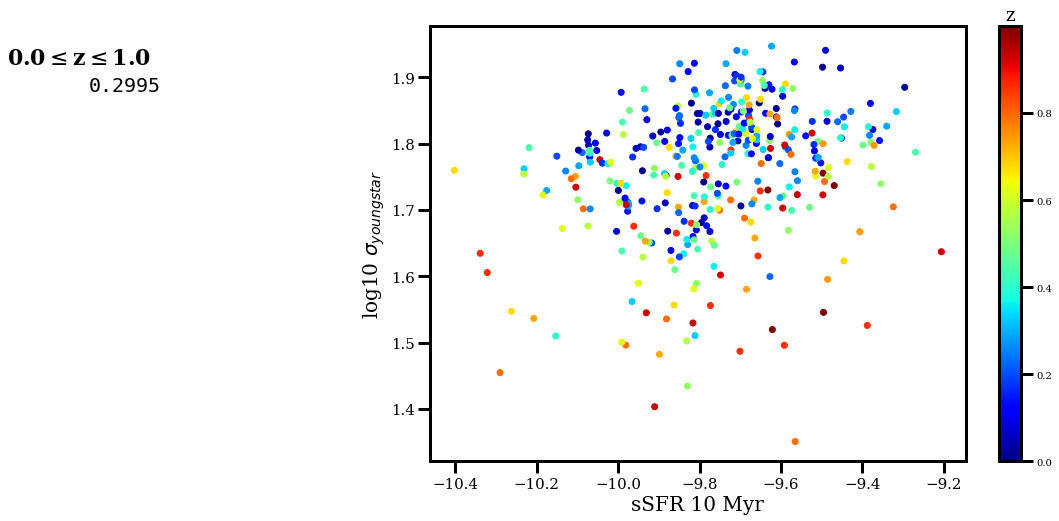

In [86]:
zmin = 0.0
zmax = 1.0

ssfrmin = -12
ssfrmax = -8

fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)

# get data
sigGas = []
ssfr = []
zall = []
for idx,gal in enumerate(cdmgals):
    if gal == 597: continue
    
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = data['sigma_youngstar_m'][data['z'] <= zmax].to_numpy()
    c = data['z'][data['z'] <= zmax].to_numpy()
    
    x = x[c>=zmin]
    y = y[c>=zmin]
    c = c[c>=zmin]
    
    c = c[x>=ssfrmin]
    y = y[x>=ssfrmin]
    x = x[x>=ssfrmin]
    
    c = c[x<=ssfrmax]
    y = y[x<=ssfrmax]
    x = x[x<=ssfrmax]
    
    for i,_ in enumerate(x):
        ssfr.append(x[i])
        sigGas.append(y[i])
        zall.append(c[i])

rs = ss.spearmanr(ssfr,np.log10(sigGas))[0]
        
# scatter 
plt.scatter(ssfr, np.log10(sigGas), c=zall, cmap='jet')

plt.xlabel('sSFR 10 Myr', fontsize=20)
plt.ylabel(r'log10 $\sigma_{youngstar}$', fontsize=20)

#plt.xlim([-11,-7.5])

clb = plt.colorbar()
clb.ax.set_title('z', fontsize=18)

plt.text(x=-11.5, y=1.92, s=str(zmin)+r'$\leq$z$\leq$'+str(zmax), fontsize=22, weight='bold')
plt.text(x=-11.30, y=1.88, s=str(rs)[:6], fontsize=20, fontfamily='monospace')

#plt.savefig('../figures/breathingModes/ssfr10_SigGas/m_z1.2-2.3.png')